### RI TP7

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import Document
import porter
import TextRepresenter
import Parser
import ParserCACM
from index import *
from weighter import *
from modeles import *
from evaluation import *
from QueryParser import *
from RandomModel import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
index = Index("easyCLEF08")

In [3]:
index.indextion(source = 'easyCLEF08/easyCLEF08_text.txt')

In [4]:
index.indextion_inverse(source = "easyCLEF08/easyCLEF08_text.txt")

In [5]:
index

### Comparaison des Méthodes :

In [6]:
weighter = Weighter_01(index)
model = Vectoriel(index, weighter, True)

In [8]:
porter = TextRepresenter.PorterStemmer()
query_parser = QueryParser(TextRepresenter.PorterStemmer())
query_parser.initQry('easyCLEF08/easyCLEF08_query.txt')
query_parser.initRel('easyCLEF08/easyCLEF08_gt.txt')
queries = []
for i in range(0,39):
    q =query_parser.nextQuery()
    queries.append(q)

In [9]:
eval =CRn(model, queries, 20)
res = eval.rappel()
res2 = eval.precision()


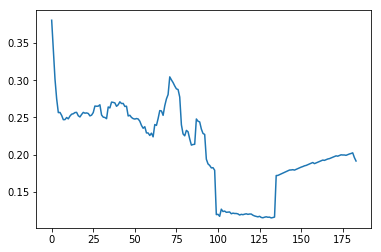

In [10]:
plt.plot(res2, label = 'weighter' )

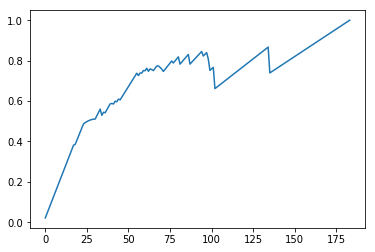

In [101]:
plt.plot(res, label = 'weighter' )

In [11]:
weighter = Weighter_01(index)
model_vect = Vectoriel(index, weighter, True)
model_l = ModelLangue(index, 0.05)
model_o = ModelBM25(index)
models = [model_vect, model_l, model_o]

In [135]:
pn20 = []
crn20 = []
for i in models:
    
    Eval = Pn(i, queries, 20)
    pn20.append(Eval.Evaluation_queries())
    Eval2 = CRn(i, queries, 20)
    crn20.append(Eval2.Evaluation_queries())
    

/Users/macos/Desktop/master2/RI/modeles.py:86: RuntimeWarning: divide by zero encountered in log
  scores[doc] += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))
/Users/macos/Desktop/master2/RI/modeles.py:88: RuntimeWarning: divide by zero encountered in log
  x += np.log((1 - self.lamda) * float(sum(docs.values())) / sum(lengthDocs.values()))


In [143]:
result = pd.DataFrame([pn20,crn20], index = ["P@20", "CR@20"], columns = ['Vectoriel', 'MOdelLangue', 'BM25'])
result

,Vectoriel,MOdelLangue,BM25
P@20,0.229487,0.239744,0.657692
CR@20,0.078038,0.088071,0.167224


# choix de l'algorithme glustering:

https://nlp.stanford.edu/IR-book/html/htmledition/hierarchical-clustering-1.html
    
https://nlp.stanford.edu/IR-book/html/htmledition/flat-clustering-1.html
    
https://nlp.stanford.edu/IR-book/html/htmledition/model-based-clustering-1.html#sec:modelclustering
    
http://iajit.org/PDF/vol.5,no.3/15-191.pdf

EM algorithm :
    
Avantage:
    
-il a une base statistique solide

-il est robuste aux données bruyantes

-il peut gérer une grande dimensionnalité

-il converge rapidement avec une bonne initialisation